In [1]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import seaborn as sns  # Importing seaborn for data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for creating static, animated, and interactive visualizations
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler to normalize or standardize data
from sklearn.model_selection import train_test_split  # Importing train_test_split to split the dataset into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor for building a random forest model
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder to convert categorical labels into numerical format
import joblib  # Importing joblib to save and load machine learning models
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/shoe_size.csv')

In [4]:
data

,height,sex,shoe_size
0,160,F,40.0
1,171,F,39.0
2,174,F,39.0
3,176,F,40.0
4,195,M,46.0
...,...,...,...
125,180,M,43.0
126,185,M,46.0
127,188,M,46.0
128,190,M,46.0


In [5]:
data.tail(5)

,height,sex,shoe_size
125,180,M,43.0
126,185,M,46.0
127,188,M,46.0
128,190,M,46.0
129,175,M,44.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   height     130 non-null    int64  
 1   sex        130 non-null    object 
 2   shoe_size  130 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


In [7]:
data.isna().sum()

,0
height,0
sex,0
shoe_size,0


In [8]:
data.describe()

,height,shoe_size
count,130.000000,130.000000
mean,166.861538,40.180769
std,35.485285,5.206586
min,1.000000,35.000000
25%,163.000000,38.000000
50%,169.500000,39.000000
75%,175.000000,42.000000
max,364.000000,88.000000


In [9]:
data = data.drop_duplicates()

In [10]:
data

,height,sex,shoe_size
0,160,F,40.0
1,171,F,39.0
2,174,F,39.0
3,176,F,40.0
4,195,M,46.0
...,...,...,...
124,182,M,44.0
125,180,M,43.0
126,185,M,46.0
127,188,M,46.0


In [11]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.1 MB/s eta 0:00:00


In [12]:
from ydata_profiling import ProfileReport

In [13]:
profile = ProfileReport(data, title="Ydata_profiling_analysis",explorative =False)

In [14]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# Calculates the frequency distribution of the 'sex' column in the DataFrame data
frequency = data['sex'].value_counts().sort_index()

In [16]:
frequency

,count
sex,
F,62
M,28
M,2


In [17]:
# Removes leading and trailing whitespace from the 'sex' column values
data['sex'] = data['sex'].str.strip()

In [18]:
frequency = data['sex'].value_counts().sort_index()

In [19]:
frequency

,count
sex,
F,62
M,30


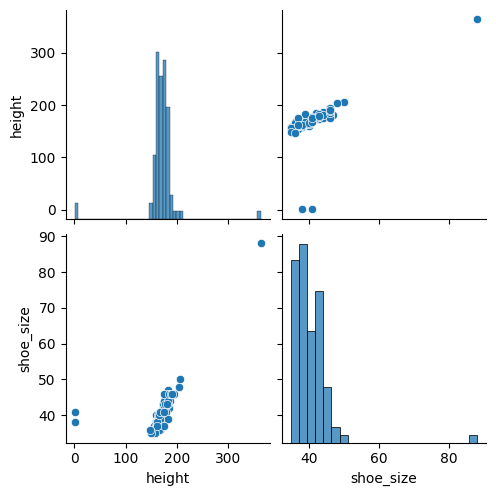

In [20]:
# Pairplot to show relationships between variables
sns.pairplot(data)
plt.show()

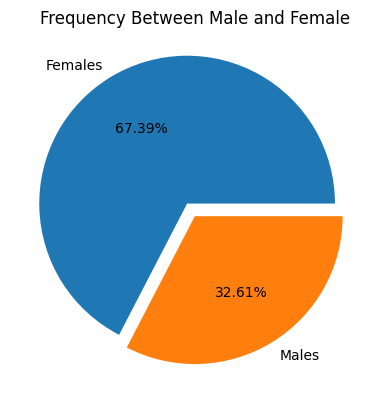

In [21]:
xplode = [0.1,0]
plt.pie(frequency, labels=['Females', 'Males'], explode=xplode, autopct='%.2f%%')
plt.title('Frequency Between Male and Female')
plt.show()

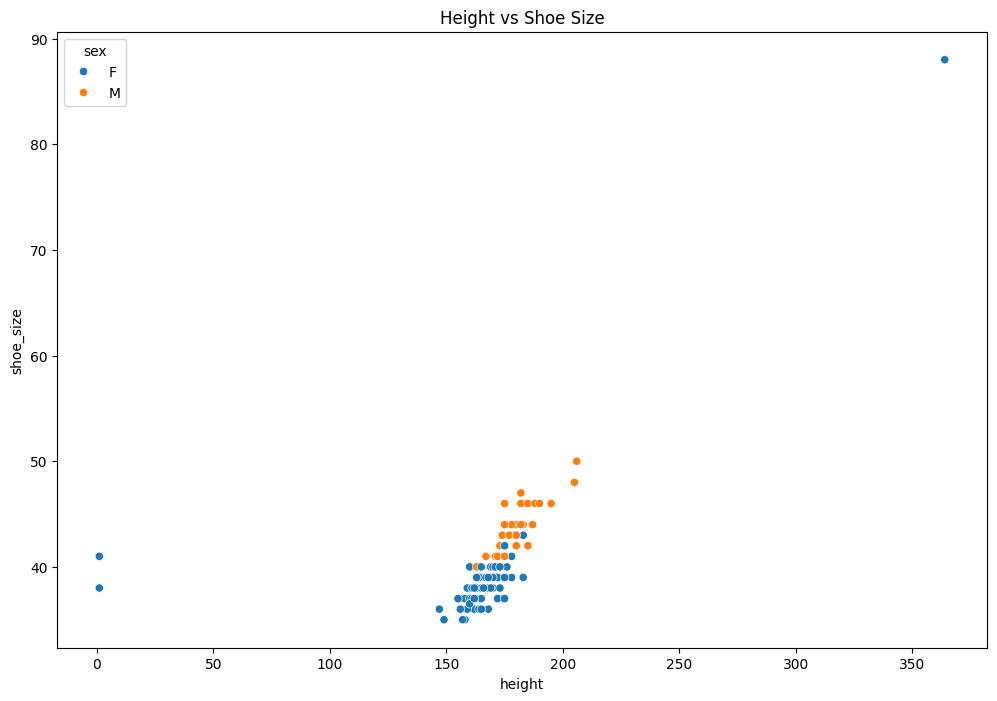

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='height', y='shoe_size', hue='sex', data=data)
plt.title("Height vs Shoe Size")
plt.show()

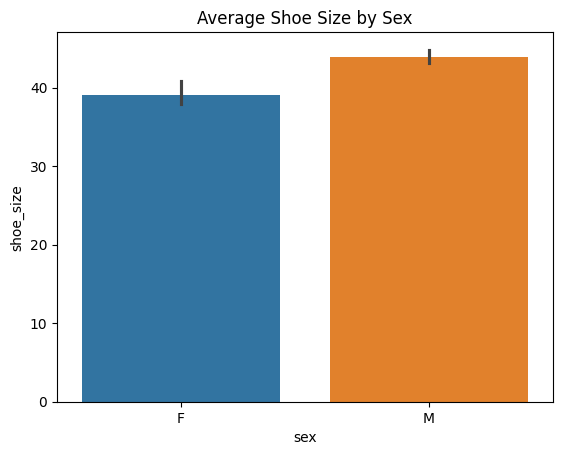

In [23]:
sns.barplot(x='sex', y='shoe_size', hue='sex', data=data)
plt.title("Average Shoe Size by Sex")
plt.show()

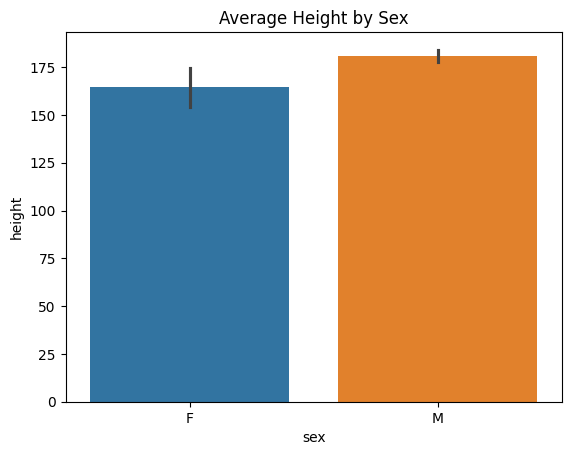

In [24]:
sns.barplot(x='sex', y='height', hue='sex', data=data)
plt.title("Average Height by Sex")
plt.show()

In [25]:
comax = data[['height', 'shoe_size']].corr()

<Axes: >

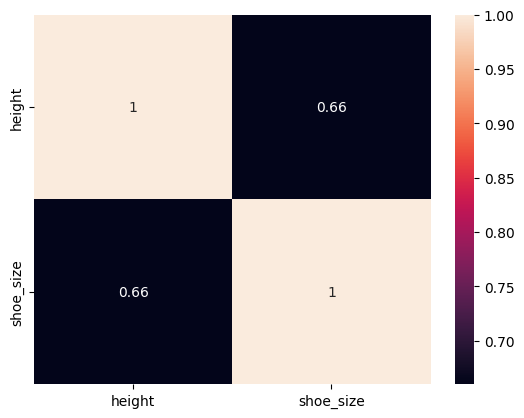

In [26]:
sns.heatmap(comax, annot=True)

In [27]:
data.head()

,height,sex,shoe_size
0,160,F,40.0
1,171,F,39.0
2,174,F,39.0
3,176,F,40.0
4,195,M,46.0


In [28]:
encoder = LabelEncoder()
data['encoded_sex'] = encoder.fit_transform(data['sex'])

In [29]:
data.head()

,height,sex,shoe_size,encoded_sex
0,160,F,40.0,0
1,171,F,39.0,0
2,174,F,39.0,0
3,176,F,40.0,0
4,195,M,46.0,1


In [30]:
x = data.iloc[:,[0,3]]
y = data['shoe_size']

In [31]:
#Let's scale our data
pscaler = StandardScaler()
x = pscaler.fit_transform(x)

In [32]:
#Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [33]:
pforest = RandomForestRegressor()
pforest.fit(x_train, y_train)

RandomForestRegressor()

In [34]:
accuracy = pforest.score(x_train, y_train)
accuracy * 100

91.33125491909804

In [35]:
prediction = pforest.predict(x_test)
prediction

array([36.65533333, 38.4805    , 43.62842857, 40.295     , 37.17742857,
       37.48916667, 47.10333333, 40.58833333, 36.65533333, 37.95785714,
       36.65533333, 43.54833333, 43.27066667, 39.60116667, 38.4805    ,
       45.78333333, 37.38      , 37.38      , 41.54638095])

In [36]:
joblib.dump(pscaler, 'Pscalers.pkl')

['Pscalers.pkl']

In [37]:
joblib.dump(pforest, 'Pforests.pkl')

['Pforests.pkl']